## Introducción al Machine Learning 
### Importancia de Caracteristicas 

Este cuaderno muestra un ejemplo de cómo calcular la importancia de las características de un clasificador entrenado

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
bank = pd.read_csv('../data/bank.csv', sep=";")

In [4]:
features = bank.drop(columns='y')
features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


Hacemos las transformaciones para tener todas las características numéricas
- Un ordinal para education
- Variables binarias (0-1) para todas las nominales (yes/no)

In [5]:
educ_mapping = {'unknown':0,
                'primary':1,
                'secondary':2, 
                'tertiary':3}
features.education.replace(educ_mapping, inplace=True)

Podemos hacer el replace sobre todo el dataframe, porque no hay otros valores que coincidan

In [6]:
yes_no_map = {
    'yes': 1,
    'no': 0
}
features.replace(yes_no_map, inplace=True)
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,1,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,2,0,4789,1,1,cellular,11,may,220,1,339,4,failure
2,35,management,single,3,0,1350,1,0,cellular,16,apr,185,1,330,1,failure
3,30,management,married,3,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,2,0,0,1,0,unknown,5,may,226,1,-1,0,unknown


In [7]:
scale_fts = ['age','balance','day','duration','pdays']
features.loc[:, scale_fts] = StandardScaler().fit_transform(features.loc[:,scale_fts])
minmax_fts = ['education','campaign','previous']
features.loc[:, minmax_fts] = MinMaxScaler().fit_transform(features.loc[:, minmax_fts])
features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.056270,unemployed,married,0.333333,0,0.121072,0,0,cellular,0.374052,oct,-0.711861,0.000000,-0.407218,0.00,unknown
1,-0.772583,services,married,0.666667,0,1.118644,1,1,cellular,-0.596026,may,-0.169194,0.000000,2.989044,0.16,failure
2,-0.583458,management,single,1.000000,0,-0.024144,1,0,cellular,0.010273,apr,-0.303898,0.000000,2.899143,0.04,failure
3,-1.056270,management,married,1.000000,0,0.017726,1,1,unknown,-1.566105,jun,-0.250017,0.061224,-0.407218,0.00,unknown
4,1.686036,blue-collar,married,0.666667,0,-0.472753,1,0,unknown,-1.323585,may,-0.146102,0.000000,-0.407218,0.00,unknown


eliminaremos la variable 'month' por un tema de rendimiento

In [8]:
features.drop('month', axis=1, inplace=True)

In [9]:
features = pd.get_dummies(features)
features.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.333333,0,0.121072,0,0,0.374052,-0.711861,0.000000,-0.407218,...,0,1,0,1,0,0,0,0,0,1
1,-0.772583,0.666667,0,1.118644,1,1,-0.596026,-0.169194,0.000000,2.989044,...,0,1,0,1,0,0,1,0,0,0
2,-0.583458,1.000000,0,-0.024144,1,0,0.010273,-0.303898,0.000000,2.899143,...,0,0,1,1,0,0,1,0,0,0
3,-1.056270,1.000000,0,0.017726,1,1,-1.566105,-0.250017,0.061224,-0.407218,...,0,1,0,0,0,1,0,0,0,1
4,1.686036,0.666667,0,-0.472753,1,0,-1.323585,-0.146102,0.000000,-0.407218,...,0,1,0,0,0,1,0,0,0,1


In [10]:
target = bank.y

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.4,
                                                    stratify=target)

In [12]:
dtree = DecisionTreeClassifier(max_depth=7)
_ = dtree.fit(x_train, y_train)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
_ = knn.fit(features.values, target)

In [14]:
knn.predict(x_train)

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

El accuracy de base.  Tomaremos este valor como referencia 
respecto al cálculo de la importancia de características

In [15]:
print(dtree.score(x_train, y_train))
print(knn.score(x_train, y_train))

0.9387905604719764
0.9192477876106194


___

In [16]:
from sklearn.inspection import permutation_importance

Calculamos la importancia de características por permutación utilizando
la función disponible en sklearn

In [17]:
pimp_knn = permutation_importance(knn, x_train, y_train, n_repeats=10)
pimp_tree = permutation_importance(dtree, x_train, y_train, n_repeats=10)

In [18]:
imp_df = pd.DataFrame({'ft': features.columns,
                       'tree_mean': pimp_tree.importances_mean,
                       'tree_std': pimp_tree.importances_std,
                       'knn_mean': pimp_knn.importances_mean,
                       'knn_std': pimp_knn.importances_std
                      })
imp_df.sort_values('tree_mean', ascending=False, inplace=True)

In [19]:
imp_df_better = imp_df.iloc[:10]

In [20]:
imp_df_better

,ft,tree_mean,tree_std,knn_mean,knn_std
7,duration,0.076807,0.002086,0.043695,0.002905
31,poutcome_success,0.022308,0.001496,0.006195,0.000321
9,pdays,0.016630,0.001685,0.012094,0.001378
24,marital_married,0.006822,0.000795,-0.000442,0.001436
0,age,0.006711,0.000770,0.008370,0.002053
6,day,0.006305,0.001261,0.006527,0.001938
16,job_retired,0.006305,0.000815,0.000111,0.000332
3,balance,0.005236,0.000734,0.006637,0.001590
1,education,0.004056,0.001030,-0.000922,0.000892
26,contact_cellular,0.002507,0.000752,0.000258,0.001466


(array([0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25]),
 [Text(0.25, 0, 'duration'),
  Text(1.25, 0, 'poutcome_success'),
  Text(2.25, 0, 'pdays'),
  Text(3.25, 0, 'marital_married'),
  Text(4.25, 0, 'age'),
  Text(5.25, 0, 'day'),
  Text(6.25, 0, 'job_retired'),
  Text(7.25, 0, 'balance'),
  Text(8.25, 0, 'education'),
  Text(9.25, 0, 'contact_cellular')])

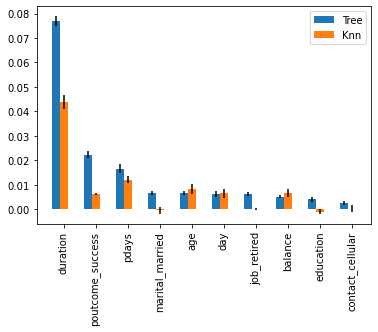

In [21]:
bw=0.25
plt.bar(np.arange(imp_df_better.shape[0]),
                  imp_df_better.tree_mean,
                  yerr=imp_df_better.tree_std,
                  width=bw,
                  tick_label=imp_df_better.ft,
                  )
plt.bar(np.arange(imp_df_better.shape[0])+bw,
                  imp_df_better.knn_mean,
                  yerr=imp_df_better.knn_std,
                  width=bw,
                  tick_label=imp_df_better.ft)
plt.legend(['Tree','Knn'])
plt.xticks(rotation=90)

___

### Ejercicio Propuesto
Realizar la importancia de características para el KNN, pero ahora partiendo de las características originales, sólo haciendo la transformación necesaria para las variables dummies
- Comparar el resultado
- Justificar la diferencia que ocurre por la diferencia de normalización y escalado de algunas características